In [1]:
#Optimizacion Bayesiana de hiperparametros de  rpart
#funciona automaticamente con EXPERIMENTOS
#va generando incrementalmente salidas para kaggle

#limpio la memoria
rm( list=ls() )  #remove all objects
gc()             #garbage collection

library("data.table")
library("rlist")
library("yaml")

library("rpart")
library("parallel")

#paquetes necesarios para la Bayesian Optimization
library("DiceKriging")
library("mlrMBO")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,492137,26.3,1085215,58,641780,34.3
Vcells,940985,7.2,8388608,64,1753993,13.4


Warning message:
“package ‘rlist’ was built under R version 3.6.3”
Warning message:
“package ‘yaml’ was built under R version 3.6.3”
Warning message:
“package ‘rpart’ was built under R version 3.6.3”
Warning message:
“package ‘DiceKriging’ was built under R version 3.6.3”
Warning message:
“package ‘mlrMBO’ was built under R version 3.6.3”
Loading required package: mlr

Warning message:
“package ‘mlr’ was built under R version 3.6.3”
Loading required package: ParamHelpers

Warning message:
“package ‘ParamHelpers’ was built under R version 3.6.3”
Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: smoof

Warning message:
“package ‘smoof’ was built under R version 3.6.3”
Loading required package: checkmate

Warning message:
“package ‘checkmate’ was built under R versi

Single-objective function
Name: Cosine Mixture Function
Description: no description
Tags: single-objective, discontinuous, non-differentiable, separable, scalable, multimodal
Noisy: FALSE
Minimize: TRUE
Constraints: TRUE
Number of parameters: 1
           Type len Def  Constr Req Tunable Trafo
x numericvector   1   - -1 to 1   -    TRUE     -
Global optimum objective value of -0.1000 at
  x
1 0


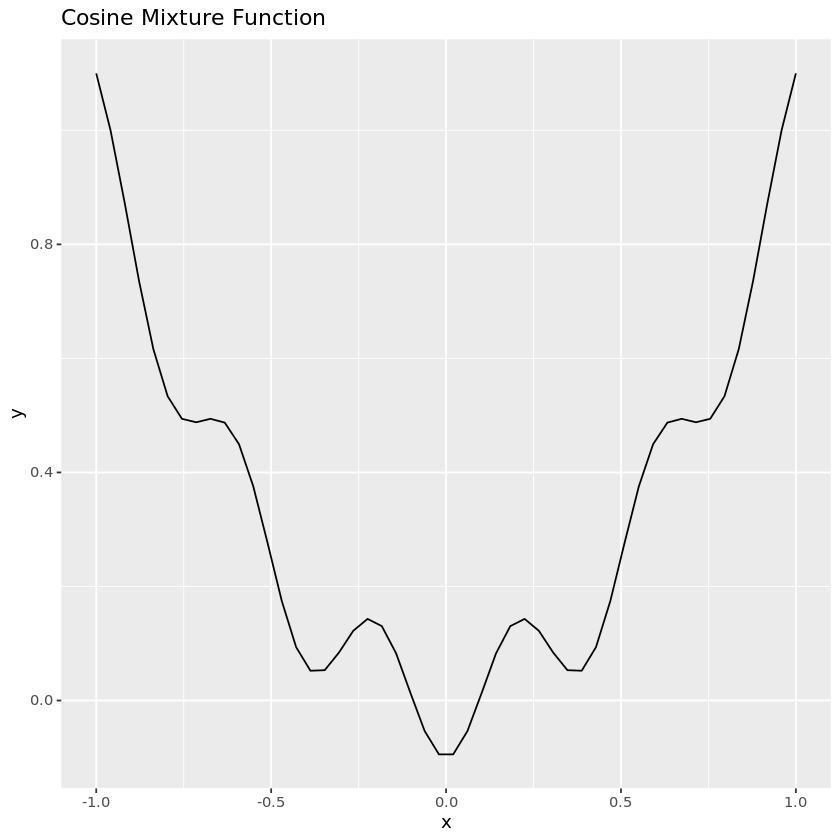

In [2]:
obj.fun = makeCosineMixtureFunction(1)
obj.fun = convertToMinimization(obj.fun)
print(obj.fun)

ggplot2::autoplot(obj.fun)

In [3]:
des = generateDesign(n = 5, par.set = getParamSet(obj.fun), fun = lhs::randomLHS)

In [4]:
des$y = apply(des, 1, obj.fun)

In [5]:
surr.km = makeLearner("regr.km", predict.type = "se", covtype = "matern3_2", control = list(trace = FALSE))

In [6]:
control = makeMBOControl()
control = setMBOControlTermination(control, iters = 10)
control = setMBOControlInfill(control, crit = makeMBOInfillCritEI())

In [7]:
run = mbo(obj.fun, design = des, learner = surr.km, control = control, show.info = TRUE)


[mbo] 1: x=-0.0742 : y = -0.034 : 0.0 secs : infill_ei

[mbo] 2: x=-0.0185 : y = -0.0955 : 0.0 secs : infill_ei

[mbo] 3: x=0.00734 : y = -0.0993 : 0.0 secs : infill_ei

[mbo] 4: x=-0.00244 : y = -0.0999 : 0.0 secs : infill_ei

[mbo] 5: x=-0.271 : y = 0.117 : 0.0 secs : infill_ei

[mbo] 6: x=0.00148 : y = -0.1 : 0.0 secs : infill_ei

[mbo] 7: x=-0.000315 : y = -0.1 : 0.0 secs : infill_ei

[mbo] 8: x=-0.00674 : y = -0.0994 : 0.0 secs : infill_ei

[mbo] 9: x=0.00041 : y = -0.1 : 0.0 secs : infill_ei

[mbo] 10: x=-0.00105 : y = -0.1 : 0.0 secs : infill_ei



In [8]:

print(run)

Recommended parameters:
x=-0.000315
Objective: y = -0.100

Optimization path
5 + 10 entries in total, displaying last 10 (or less):
               x           y dob eol error.message exec.time            ei
6  -0.0741712543 -0.03396639   1  NA          <NA>     0.001 -6.068228e-02
7  -0.0184869241 -0.09547141   2  NA          <NA>     0.000 -7.446116e-03
8   0.0073430289 -0.09928160   3  NA          <NA>     0.000 -6.021684e-03
9  -0.0024432110 -0.09992040   4  NA          <NA>     0.002 -1.613008e-03
10 -0.2709988558  0.11743591   5  NA          <NA>     0.000 -2.500579e-04
11  0.0014765569 -0.09997092   6  NA          <NA>     0.000 -2.188277e-04
12 -0.0003149864 -0.09999868   7  NA          <NA>     0.000 -5.470100e-05
13 -0.0067430554 -0.09939411   8  NA          <NA>     0.001 -1.984537e-05
14  0.0004100026 -0.09999776   9  NA          <NA>     0.000 -9.879351e-06
15 -0.0010534153 -0.09998520  10  NA          <NA>     0.000 -4.746955e-06
   error.model train.time prop.type propose

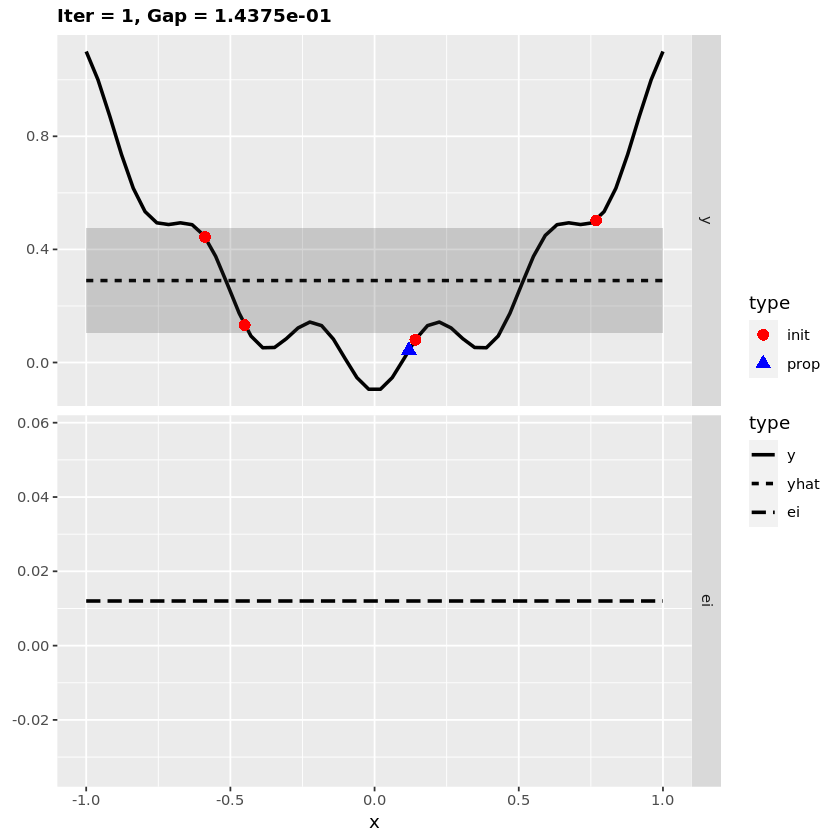

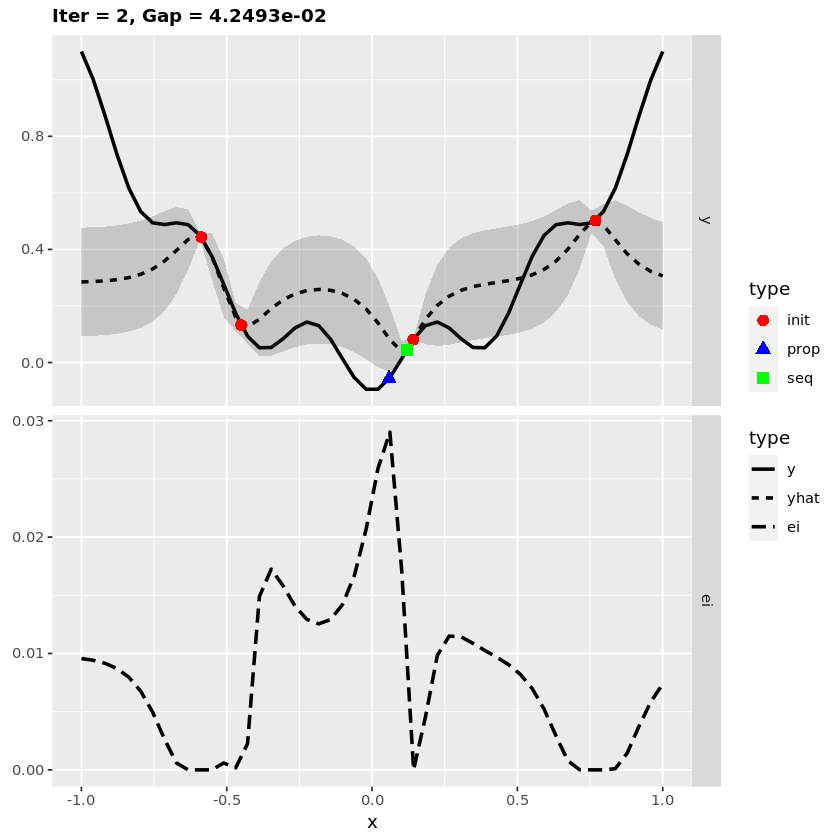

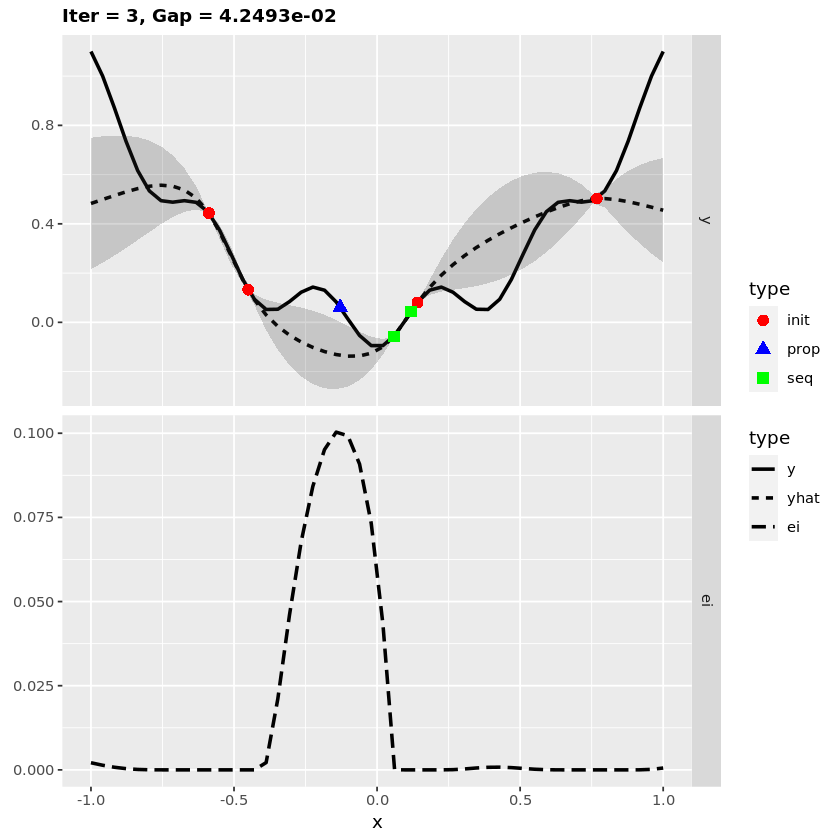

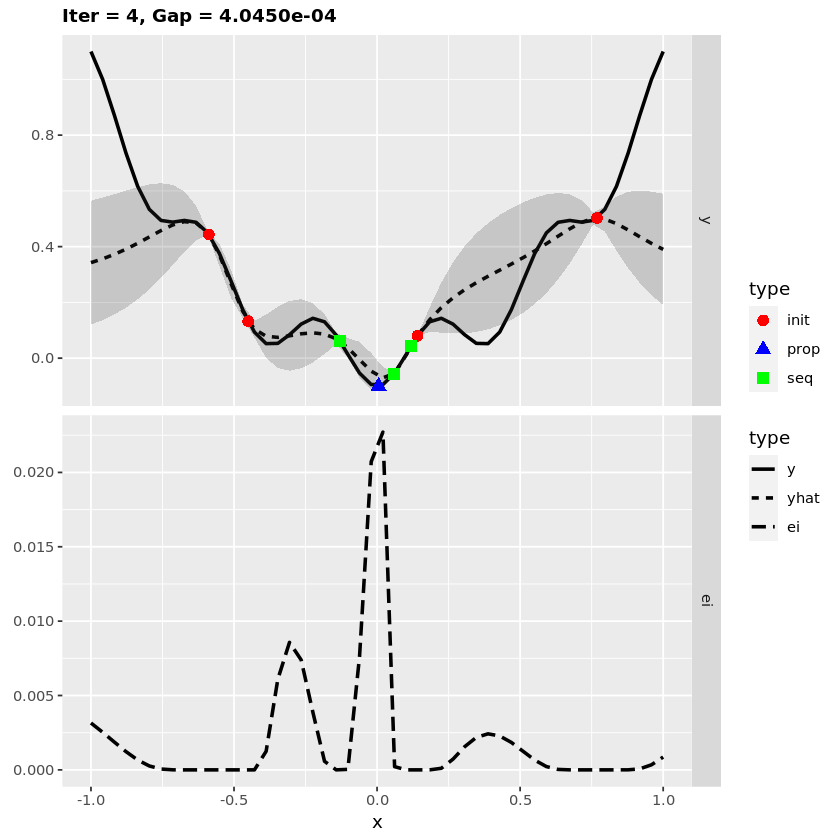

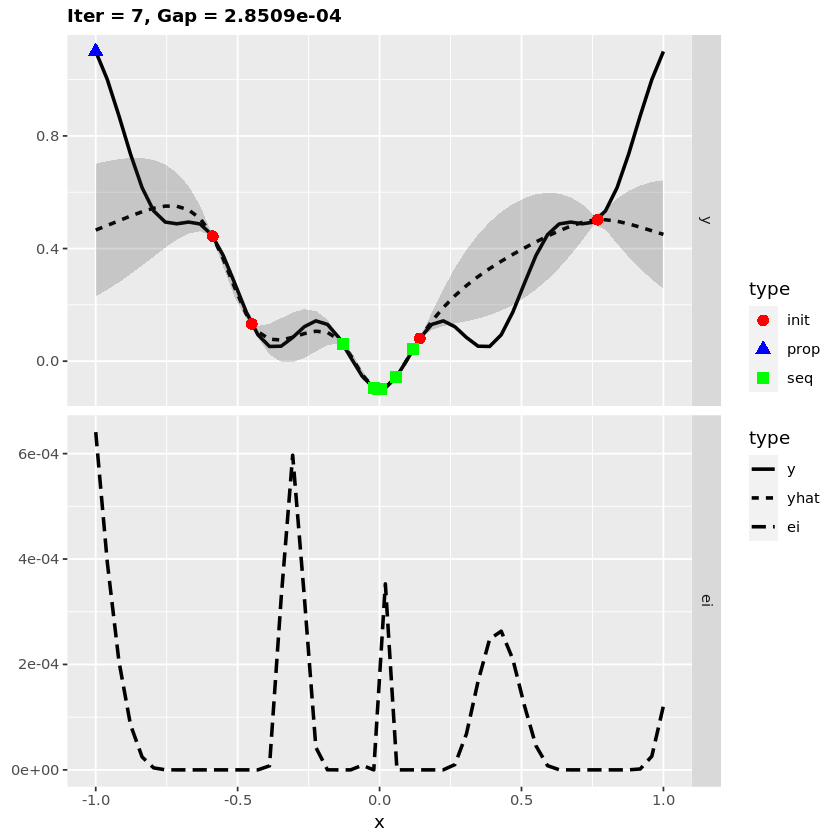

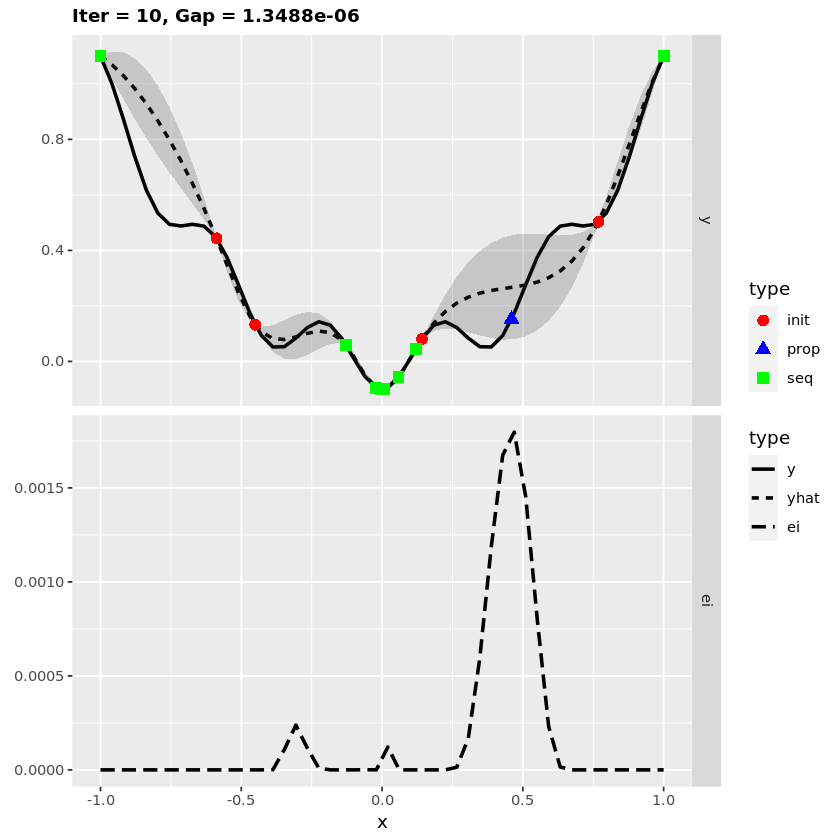

In [11]:
run = exampleRun(obj.fun, learner = surr.km, control = control, show.info = FALSE)

plotExampleRun(run, iters = c(1L, 2L, 3L,4L,7L, 10L), pause = FALSE)